# Terminal Command Next Word Prediction

This notebook demonstrates how to build a simple linear regression model to predict the next word in terminal commands. We'll go through the following steps:

1. Data Generation and Exploration
2. Data Preprocessing
3. Feature Engineering
4. Model Training
5. Evaluation and Prediction

## Setup
First, let's import the required libraries.

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Set random seed for reproducibility
np.random.seed(42)

## 1. Data Generation and Exploration

We'll create a synthetic dataset of common terminal commands and analyze its characteristics.

Sample commands:
- ls -la /home
- cd /usr/local/bin
- cp file1.txt file2.txt
- mv document.pdf Downloads
- rm temp.txt


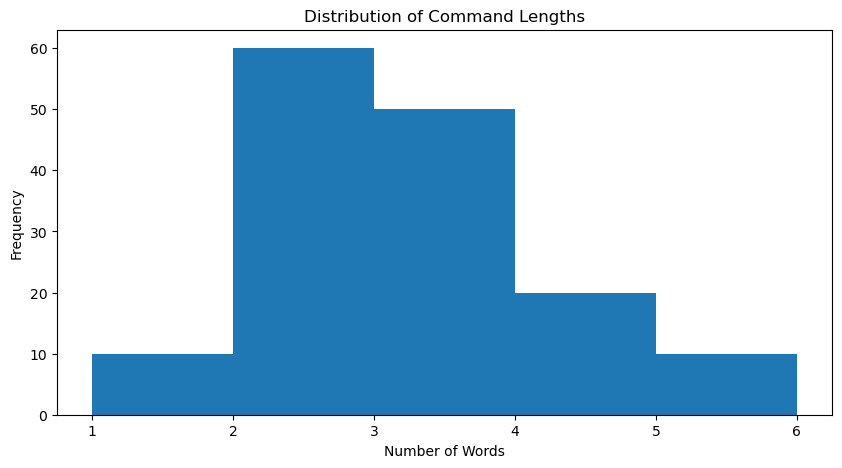

In [2]:
def generate_terminal_commands():
    """
    Generate a synthetic dataset of terminal commands.
    
    Returns:
        list: A list of terminal command strings
    """
    commands = [
        "ls -la /home",
        "cd /usr/local/bin",
        "cp file1.txt file2.txt",
        "mv document.pdf Downloads",
        "rm temp.txt",
        "mkdir new_directory",
        "touch newfile.txt",
        "chmod 755 script.sh",
        "grep pattern file.txt",
        "find . -name *.py",
        "ps aux | grep process",
        "df -h",
        "pwd",
        "tar -czf archive.tar.gz files",
        "wget https://example.com/file"
    ] * 10
    return commands

# Generate commands
commands = generate_terminal_commands()

# Display first few commands
print("Sample commands:")
for cmd in commands[:5]:
    print(f"- {cmd}")

# Analyze command lengths
cmd_lengths = [len(cmd.split()) for cmd in commands]
plt.figure(figsize=(10, 5))
plt.hist(cmd_lengths, bins=range(min(cmd_lengths), max(cmd_lengths) + 2, 1))
plt.title('Distribution of Command Lengths')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

## 2. Data Preprocessing

Now we'll prepare the data for our model by splitting commands into sequences and targets.

In [ ]:
def preprocess_commands(commands):
    """
    Preprocess commands into input sequences and target words.
    
    Args:
        commands (list): List of command strings
        
    Returns:
        tuple: (X, y) where X is list of input sequences and y is list of target words
    """
    # Split commands into words
    command_sequences = [cmd.split() for cmd in commands]
    
    X = []
    y = []
    
    for sequence in command_sequences:
        if len(sequence) > 1:
            input_seq = sequence[:-1]
            padded_seq = input_seq + ['PAD'] * (5 - len(input_seq))
            X.append(padded_seq)
            y.append(sequence[-1])
    
    return X, y

X, y = preprocess_commands(commands)

print("Example preprocessing:")
for i in range(3):
    print(f"Input sequence: {X[i]}")
    print(f"Target word: {y[i]}\n")

## 3. Feature Engineering

We'll convert our text data into numerical features using one-hot encoding.

In [ ]:
def encode_features(X, y):
    """
    Convert text features to numerical using one-hot encoding.
    
    Args:
        X (list): List of input sequences
        y (list): List of target words
        
    Returns:
        tuple: (X_encoded, y_encoded, encoder_X, encoder_y)
    """
    encoder_X = OneHotEncoder(sparse=False, handle_unknown='ignore')
    encoder_y = OneHotEncoder(sparse=False, handle_unknown='ignore')
    
    X_flat = np.array(X).reshape(-1, 1)
    encoder_X.fit(X_flat)
    
    X_encoded = []
    for sequence in X:
        sequence_encoded = encoder_X.transform(np.array(sequence).reshape(-1, 1))
        X_encoded.append(sequence_encoded.flatten())
    
    y_encoded = encoder_y.fit_transform(np.array(y).reshape(-1, 1))
    
    return np.array(X_encoded), y_encoded, encoder_X, encoder_y

X_encoded, y_encoded, encoder_X, encoder_y = encode_features(X, y)

print("Feature encoding shapes:")
print(f"X shape: {X_encoded.shape}")
print(f"y shape: {y_encoded.shape}")

## 4. Model Training

Now we'll train our linear regression model.

In [ ]:
def train_model(X, y):
    """
    Train a linear regression model.
    
    Args:
        X (numpy.ndarray): Encoded input features
        y (numpy.ndarray): Encoded target values
        
    Returns:
        LinearRegression: Trained model
    """
    model = LinearRegression()
    model.fit(X, y)
    return model

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y_encoded, test_size=0.2, random_state=42
)

# Train model
model = train_model(X_train, y_train)

# Calculate training and test scores
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

print("Model Performance:")
print(f"Training R² score: {train_score:.4f}")
print(f"Testing R² score: {test_score:.4f}")

## 5. Evaluation and Prediction

Let's test our model with some example predictions.

In [ ]:
def predict_next_word(model, input_sequence, encoder_X, encoder_y):
    """
    Predict the next word given an input sequence.
    
    Args:
        model (LinearRegression): Trained model
        input_sequence (list): List of input words
        encoder_X (OneHotEncoder): Encoder for input features
        encoder_y (OneHotEncoder): Encoder for target values
        
    Returns:
        str: Predicted next word
    """
    padded_seq = input_sequence + ['PAD'] * (5 - len(input_sequence))
    
    sequence_encoded = []
    for word in padded_seq:
        word_encoded = encoder_X.transform(np.array([word]).reshape(-1, 1))
        sequence_encoded.extend(word_encoded.flatten())
    
    prediction = model.predict([sequence_encoded])
    predicted_word = encoder_y.inverse_transform(prediction.reshape(1, -1))[0][0]
    
    return predicted_word

# Test some predictions
test_sequences = [
    ['ls', '-la'],
    ['cd', '/usr'],
    ['grep', 'pattern'],
    ['mkdir']
]

print("Example predictions:")
for seq in test_sequences:
    predicted = predict_next_word(model, seq, encoder_X, encoder_y)
    print(f"Input: {' '.join(seq)}")
    print(f"Predicted next word: {predicted}\n")

## Model Limitations and Potential Improvements

1. **Dataset Limitations**:
   - Small synthetic dataset
   - Limited variety of commands
   - No real-world usage patterns

2. **Model Limitations**:
   - Linear regression might not capture complex patterns
   - No consideration of word order importance
   - Limited context window

3. **Potential Improvements**:
   - Use a larger, real-world dataset
   - Implement more sophisticated models (LSTM, Transformer)
   - Add context-aware features
   - Include command history
   - Add error handling for unknown words